In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

%matplotlib inline

In [2]:
train_set = pd.read_csv('sign_mnist_train.csv')
test_set = pd.read_csv('sign_mnist_test.csv')

In [3]:
X_train = train_set.iloc[:, 1:].values
y_train = train_set.iloc[:, 0].values

X_test = test_set.iloc[:, 1:].values
y_test = test_set.iloc[:, 0].values

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [6]:
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

In [7]:
# one hot encodi
y_train = tf.keras.utils.to_categorical(y_train, 26)
y_test = tf.keras.utils.to_categorical(y_test, 26)

In [8]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
print('total training examples:', X_train.shape[0])
print('total validation examples:', X_test.shape[0])

total training examples: 27455
total validation examples: 7172


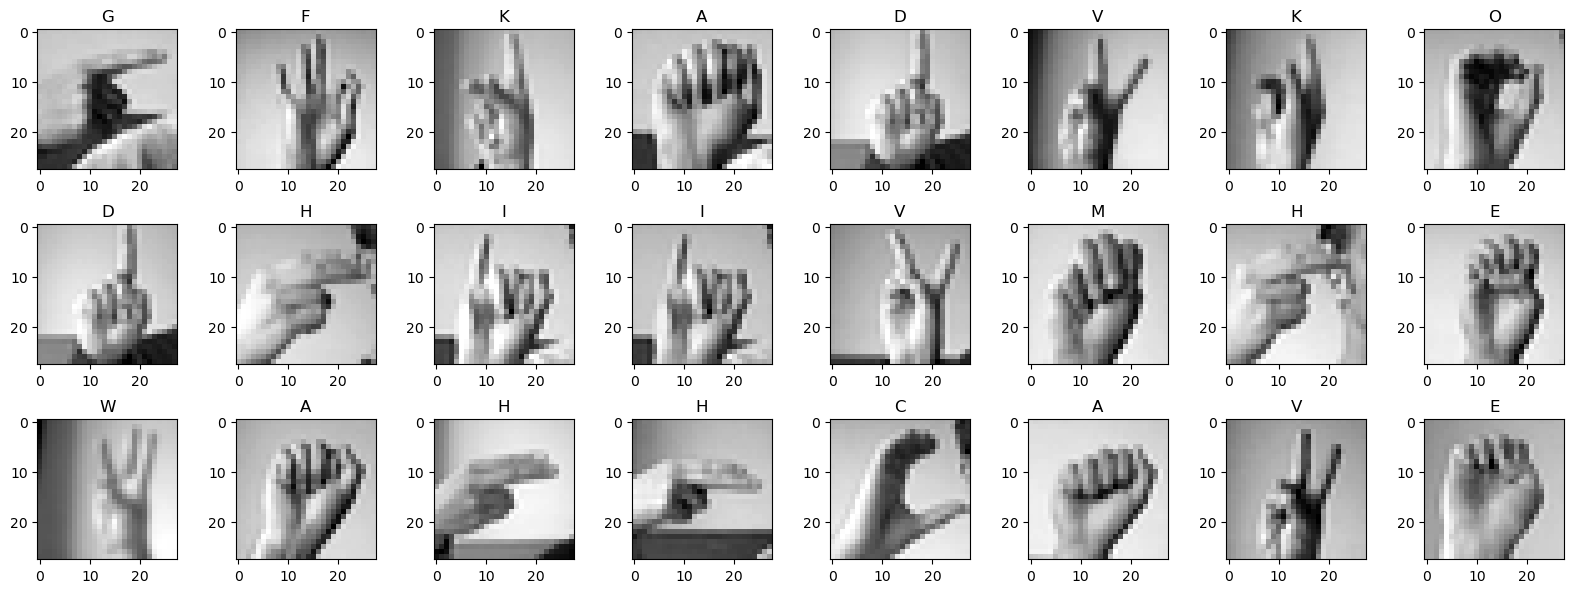

In [10]:
# Plotting our data
fig, axes = plt.subplots(3, 8, figsize=(16, 6))

for i in range(24):
    ax = axes[i//8, i%8]
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(chr(list(y_test[i]).index(max(y_test[i])) + 65))

plt.tight_layout()
plt.show()

In [11]:
# Normalizing the data
X_train  = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# Initializing model and adding layers

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28 with 1 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, kernel_size = (5,5), use_bias=False, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Dropping out 50% of the neurons
    tf.keras.layers.Dropout(0.5),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Dropping out 50% of the neurons
    tf.keras.layers.Dropout(0.5),
    # 26 output neurons. It will contain probabilities for each of the 26 classes.
    tf.keras.layers.Dense(26, activation='softmax')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        576       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0

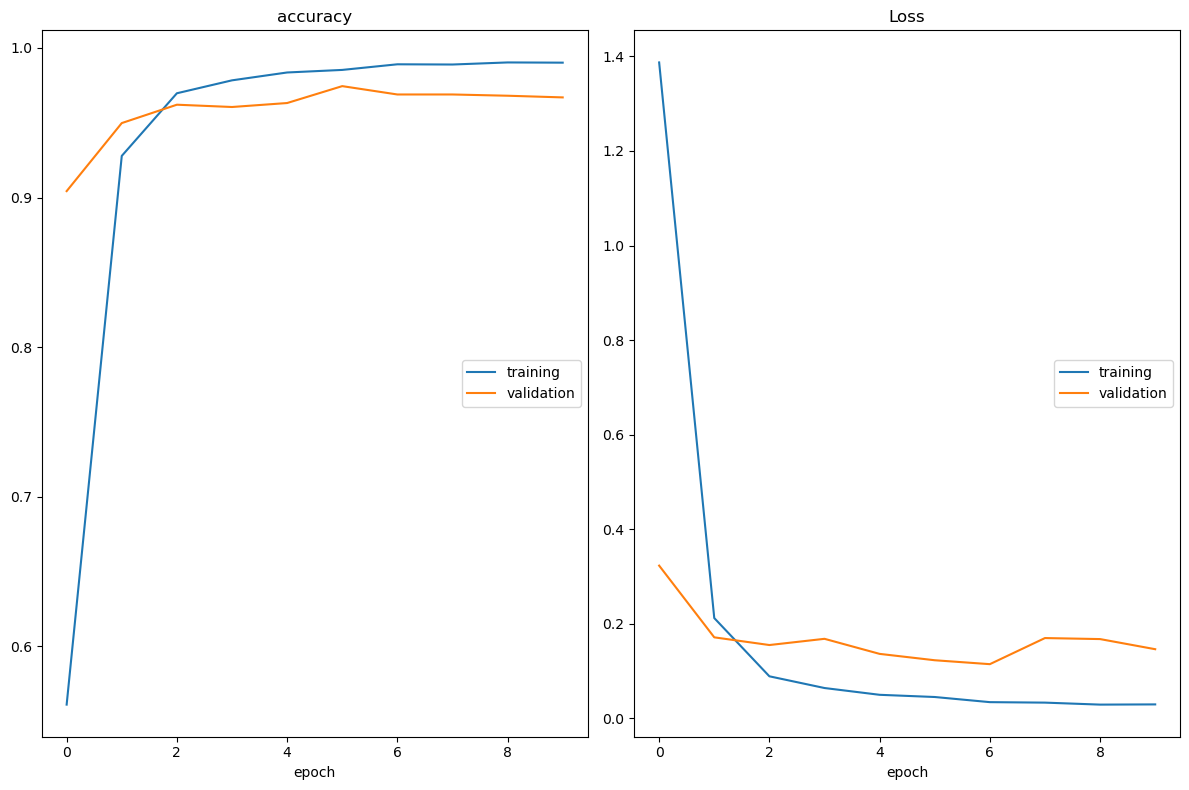

accuracy
	training         	 (min:    0.561, max:    0.990, cur:    0.990)
	validation       	 (min:    0.904, max:    0.974, cur:    0.967)
Loss
	training         	 (min:    0.029, max:    1.387, cur:    0.029)
	validation       	 (min:    0.114, max:    0.323, cur:    0.146)
857/857 [==============================] - 112s 130ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.1461 - val_accuracy: 0.9669 - lr: 0.0010
CPU times: total: 1h 27min 2s
Wall time: 17min 54s


In [15]:
%%time
from livelossplot.tf_keras import PlotLossesCallback

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.2, 
                                                 patience=5, 
                                                 min_lr=0.001)
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_weights.h5", 
                                                save_weights_only=True, 
                                                monitor='val_accuracy',
                                                mode='max', 
                                                save_best_only=True)
callbacks = [PlotLossesCallback(), reduce_lr, checkpoint]

history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    steps_per_epoch = X_train.shape[0] // 32,
    callbacks = callbacks,
    validation_data = (X_test, y_test),
    validation_steps = X_test.shape[0] // 32
)

In [16]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.14603036642074585
Test accuracy: 0.9669548273086548


In [17]:
# Saving trained model
model.save('deneme1.keras')

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Predictions for the test data
predicted_classes = model.predict_classes(X_test)
cm = metrics.confusion_matrix(y_test, predicted_classes)

NameError: name 'model' is not defined

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_train, y_test, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_train, y_test)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]
#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Confusion matrix')
plt.show()